# LINEAR REGRESSION
Making Predictions with Linear Regression

### 1. Drawing Lines

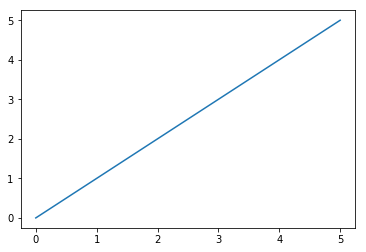

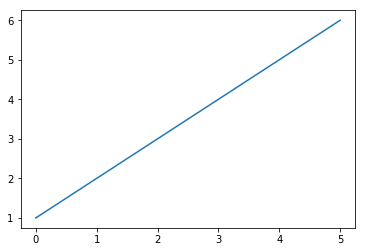

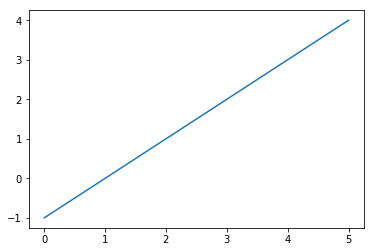

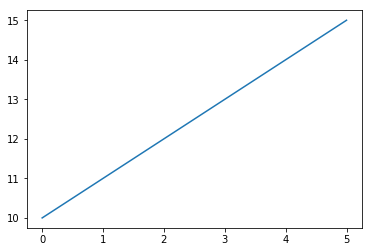

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### drawing x=y line
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
plt.plot(x,y)
plt.show()

### drawing y=x+1
x = np.asarray([0,1,2,3,4,5])
y = x +1
plt.plot(x,y)
plt.show()

### shifting the y intercept
y = x-1
plt.plot(x,y)
plt.show()

y = x + 10
plt.plot(x,y)
plt.show()




### 2. Slopes

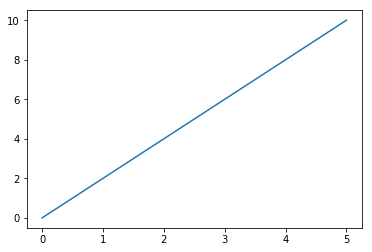

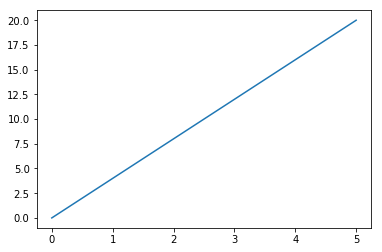

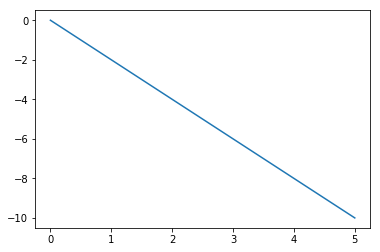

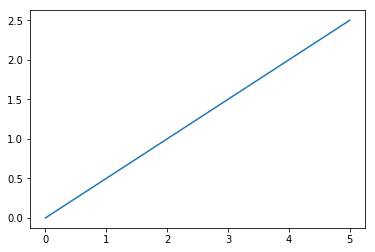

In [2]:
##setting the slope to 2
y = 2*x
plt.plot(x,y)
plt.show()

##setting the slope to 4
y = 4*x
plt.plot(x,y)
plt.show()

##setting the slope to -2
y = -2*x
plt.plot(x,y)
plt.show()

##setting the slope to 0.5
y = 0.5*x
plt.plot(x,y)
plt.show()

### 3. Calculating Slope
It is calculated as the covariance of x and y divided by the variance of x

In [5]:
from numpy import cov
import pandas as pd 

wine_test = pd.read_csv('winequalityN.csv')

x = wine_test['density']
y = wine_test['quality']

m = cov(x,y)/x.var()
print(m) 









[[ 1.00000000e+00 -8.90700748e+01]
 [-8.90700748e+01  8.48055377e+04]]


### 4. Calculating the intercept

In [10]:
def calc_slope(x,y):
    return cov(x,y)[0,1]/x.var()

mean_x = x.mean()
mean_y = y.mean()
m = calc_slope(x,y)
intercept = mean_y - (m*mean_x) ## formula to calculate the slope
print("Slope:",m)
print("Intercept:",intercept)



Slope: -89.07007482420828
Intercept: 94.41608131550524


### 5. Predicting Values

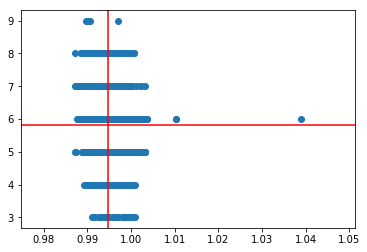

0       5.256936
1       5.880427
2       5.782450
3       5.737915
4       5.737915
5       5.782450
6       5.800264
7       5.256936
8       5.880427
9       5.898241
10      6.165451
11      5.818078
12      6.058567
13      6.129823
14      5.328192
15      6.112009
16      5.987311
17      6.307963
18      6.085288
19      5.746822
20      6.307963
21      6.129823
22      5.969497
23      5.907148
24      5.782450
25      5.746822
26      5.969497
27      5.693380
28      6.112009
29      6.183265
          ...   
6467    5.883990
6468    5.933869
6469    5.778887
6470    5.673784
6471    5.820750
6472    5.633703
6473    5.814515
6474    5.712975
6475    5.682691
6476    5.755729
6477    5.878646
6478    5.818078
6479    5.878646
6480    5.914274
6481    5.721882
6482    5.805608
6483    5.796701
6484    5.798482
6485    5.806499
6486    5.867957
6487    5.550868
6488    5.957027
6489    5.878646
6490    5.725445
6491    5.656861
6492    5.800264
6493    5.780668
6494    5.7254

In [26]:
def cal_pred(x):
    pred = m*x + intercept
    return pred

plt.scatter(x,y)
plt.axvline(np.mean(x),color="r")
plt.axhline(np.mean(y),color="r")
plt.show()

predicted_val = cal_pred(wine_test["density"])
print(predicted_val)


### 6. Errors

In [28]:
from scipy.stats import linregress

slope, intercept, r_val,p_val,stderr_slope = linregress(x,y)
print("Slope:",slope)
print("Intercept:",intercept)

predicted_y = np.asarray([slope * x + intercept for x in wine_test["density"]])
residuals = (wine_test["quality"] - predicted_y) ** 2
rss = sum(residuals)



print("Sum of Squared Residuals: ",rss) 

Slope: -89.07007482420791
Intercept: 94.41608131550534
Sum of Squared Residuals:  4490.273066634342


### 7. Standard Error
How good or bad linear model is at regression

In [35]:
slope, intercept, r_value, p_value, stderr_slope = linregress(wine_test["density"], wine_test["quality"])

predicted_y = np.asarray([slope * x + intercept for x in wine_test["density"]])
residuals = (wine_test["quality"] - predicted_y) ** 2
rss = sum(residuals)

lenrss = len(residuals)

stderror = (rss / (lenrss - 2)) ** (1/2)


within_one = len([res for res in abs(predicted_y - wine_test["quality"])  if res <= stderror]) / lenrss
within_two = len([res for res in abs(predicted_y - wine_test["quality"])  if res <= stderror*2]) / lenrss
within_three = len([res for res in abs(predicted_y - wine_test["quality"])  if res <= stderror*3]) / lenrss

print(within_one)
print(within_two)
print(within_three)


0.7074034169616746
0.9398183777127905
0.9935354779128829
